In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from os.path import expanduser

In [2]:
experiment_name = 'P3830'
feature_detection_method = 'pasef'

In [3]:
MAXIMUM_Q_VALUE = 0.01

In [4]:
BASE_RESULTS_DIR = '/media/big-ssd'
# BASE_RESULTS_DIR = '/Users/darylwilding-mcbride/Downloads'.format(experiment_name)

### analyse UPS2

#### identifications with correction for saturation

In [9]:
IDENTIFICATIONS_WITH_CS_DIR = '/media/data-4t-a/results-P3830_YUPS2/2021-10-11-12-21-21/identifications-pasef'
IDENTIFICATIONS_WITH_CS_FILE = '{}/exp-P3830_YUPS2-identifications-pasef-recalibrated.feather'.format(IDENTIFICATIONS_WITH_CS_DIR)

In [10]:
# load the identifications
identifications_with_cs_df = pd.read_feather(IDENTIFICATIONS_WITH_CS_FILE)
identifications_with_cs_df = identifications_with_cs_df[(identifications_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_with_cs_df['protein id'].str.contains('YEAST'))]

In [11]:
s1 = identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,2517,82.0
monoisotopic_saturated_adjusted,542,17.7
no_nonsaturated_isotopes,11,0.4


In [12]:
print('number of unique proteins: {}'.format(len(identifications_with_cs_df['protein id'].unique())))

number of unique proteins: 24


#### identifications without correction for saturation

In [11]:
IDENTIFICATIONS_WITHOUT_CS_DIR = '{}/results-P3830/P3830-results-cs-false-fmdw-false-2021-08-28-01-07-24/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITHOUT_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_WITHOUT_CS_DIR, experiment_name, feature_detection_method)

In [12]:
# load the identifications
identifications_without_cs_df = pd.read_feather(IDENTIFICATIONS_WITHOUT_CS_FILE)
identifications_without_cs_df = identifications_without_cs_df[(identifications_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_without_cs_df['protein id'].str.contains('YEAST'))]

In [13]:
print('number of unique proteins: {}'.format(len(identifications_without_cs_df['protein id'].unique())))

number of unique proteins: 19


#### using the Top3 approach to determine protein quanitification

In [14]:
ups2_proteins_l = []

ups2_proteins_l.append({'uniprot':'P00915', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P00918', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P01031', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P69905', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P68871', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P41159', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P02768', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P62988', 'fmoles':50000})

ups2_proteins_l.append({'uniprot':'P04040', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P00167', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P01133', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P02144', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P15559', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P62937', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'Q06830', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P63165', 'fmoles':5000})

ups2_proteins_l.append({'uniprot':'P00709', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P06732', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P12081', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P61626', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'Q15843', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P02753', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P16083', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P63279', 'fmoles':500})

ups2_proteins_l.append({'uniprot':'P01008', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P61769', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P55957', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'O76070', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P08263', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01344', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01127', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P10599', 'fmoles':50})

ups2_proteins_l.append({'uniprot':'P99999', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P06396', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P09211', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01112', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01579', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P02787', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'O00762', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P51965', 'fmoles':5})

ups2_proteins_l.append({'uniprot':'P08758', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02741', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P05413', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10145', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02788', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10636-8', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P00441', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P01375', 'fmoles':0.5})

ups2_d = {}
for p in ups2_proteins_l:
    ups2_d[p['uniprot']] = p['fmoles']

#### with correction

In [15]:
identifications_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'P00918ups|CAH2_HUMAN_UPS', 'P68871ups|HBB_HUMAN_UPS',
       'P41159ups|LEP_HUMAN_UPS', 'P69905ups|HBA_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'P62988ups|UBIQ_HUMAN_UPS',
       'Q06830ups|PRDX1_HUMAN_UPS', 'P04040ups|CATA_HUMAN_UPS',
       'P02144ups|MYG_HUMAN_UPS', 'P00167ups|CYB5_HUMAN_UPS',
       'P12081ups|SYHC_HUMAN_UPS',
       'P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_UPS,O76070ups|SYUG_HUMAN_UPS',
       'P15559ups|NQO1_HUMAN_UPS', 'P06732ups|KCRM_HUMAN_UPS',
       'P00709ups|LALBA_HUMAN_UPS', 'P63165ups|SUMO1_HUMAN_UPS',
       'P62937ups|PPIA_HUMAN_UPS'], dtype=object)

In [16]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_with_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_with_df = pd.DataFrame(top3_l)

didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS


In [17]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_with_df[top3_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

2317.72

In [18]:
top3_with_df['calculated_pmoles'] = top3_with_df.average_intensity / universal_signal_response_factor

In [19]:
# calculate the CV for the signal response factor
cv = top3_with_df.signal_response_factor.std() / top3_with_df.signal_response_factor.mean()
cv

1.2300224670279412

In [20]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_with_df[(top3_with_df.intensity_adjusted == True)]) / len(top3_with_df) * 100,1))

'61.5% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [21]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_without_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_without_df = pd.DataFrame(top3_l)

didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS


In [22]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_without_df[top3_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

1715.1133333333335

In [23]:
top3_without_df['calculated_pmoles'] = top3_without_df.average_intensity / universal_signal_response_factor

In [24]:
# calculate the CV for the signal response factor
cv = top3_without_df.signal_response_factor.std() / top3_without_df.signal_response_factor.mean()
cv

1.2531354833072597

#### calculate correlation

In [25]:
combined_df = pd.merge(top3_with_df, top3_without_df, how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_with','_without'])

In [26]:
len(combined_df)

13

In [27]:
combined_df[['pmoles_with','average_intensity_with','average_intensity_without','calculated_pmoles_with','calculated_pmoles_without']].sample(n=10)

,pmoles_with,average_intensity_with,average_intensity_without,calculated_pmoles_with,calculated_pmoles_without
3,5.0,6117.333333,6117.333333,2.639375,3.566723
1,50.0,50821.333333,44914.333333,21.927296,26.187385
9,5.0,1740.000000,1740.000000,0.750738,1.014510
11,50.0,18805.333333,18805.333333,8.113721,10.964484
2,50.0,38016.333333,21627.333333,16.402470,12.609857
5,5.0,40754.333333,35426.666667,17.583804,20.655583
4,50.0,115886.000000,85755.666667,50.000000,50.000000
10,50.0,48116.666667,39327.666667,20.760345,22.930069
12,5.0,8232.000000,8232.000000,3.551766,4.799683
7,50.0,35332.666667,30992.333333,15.244579,18.070137


In [28]:
combined_df[combined_df.protein.str.startswith('P02768')]

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
4,P02768ups|ALBU_HUMAN_UPS,50.0,115886.0,2317.72,141,True,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.0,50.0,85755.666667,1715.113333,140,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.0


In [30]:
universal_signal_response_factor_with = combined_df[combined_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_df[combined_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_without

In [31]:
combined_df['calculated_pmoles_with'] = combined_df.average_intensity_with / universal_signal_response_factor_with
combined_df['calculated_pmoles_without'] = combined_df.average_intensity_without / universal_signal_response_factor_without

In [32]:
combined_df['pmoles_with'].corr(combined_df['calculated_pmoles_with'])

0.6663992156900627

In [33]:
combined_df['pmoles_without'].corr(combined_df['calculated_pmoles_without'])

0.677690772965348

### analyse UPS1

#### identifications with correction for saturation

In [34]:
IDENTIFICATIONS_UPS1_WITH_CS_DIR = '{}/results-P3830/P3830-results-cs-true-fmdw-false-2021-08-28-03-41-51/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_UPS1_WITH_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_UPS1_WITH_CS_DIR, experiment_name, feature_detection_method)

In [35]:
# load the identifications
identifications_UPS1_with_cs_df = pd.read_feather(IDENTIFICATIONS_UPS1_WITH_CS_FILE)
identifications_UPS1_with_cs_df = identifications_UPS1_with_cs_df[(identifications_UPS1_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_UPS1_with_cs_df['protein id'].str.contains('YEAST'))]

In [36]:
s1 = identifications_UPS1_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_UPS1_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,349,92.1
monoisotopic_saturated_adjusted,30,7.9


In [37]:
print('number of unique proteins: {}'.format(len(identifications_UPS1_with_cs_df['protein id'].unique())))

number of unique proteins: 46


#### identifications without correction for saturation

In [38]:
IDENTIFICATIONS_UPS1_WITHOUT_CS_DIR = '{}/results-P3830/P3830-results-cs-false-fmdw-false-2021-08-28-06-20-27/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_UPS1_WITHOUT_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_UPS1_WITHOUT_CS_DIR, experiment_name, feature_detection_method)

In [39]:
# load the identifications
identifications_UPS1_without_cs_df = pd.read_feather(IDENTIFICATIONS_UPS1_WITHOUT_CS_FILE)
identifications_UPS1_without_cs_df = identifications_UPS1_without_cs_df[(identifications_UPS1_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_UPS1_without_cs_df['protein id'].str.contains('YEAST'))]

In [40]:
s1 = identifications_UPS1_without_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_UPS1_without_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,348,92.1
monoisotopic_saturated_adjusted,30,7.9


In [41]:
print('number of unique proteins: {}'.format(len(identifications_UPS1_without_cs_df['protein id'].unique())))

number of unique proteins: 46


### relative abundance of proteins found in common between UPS1 and UPS2

#### with correction

In [42]:
identifications_UPS1_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00441ups|SODC_HUMAN_UPS',
       'P10636-8ups|TAU_HUMAN_UPS', 'P02787ups|TRFE_HUMAN_UPS',
       'P08758ups|ANXA5_HUMAN_UPS', 'P00918ups|CAH2_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'Q06830ups|PRDX1_HUMAN_UPS',
       'P06396ups|GELS_HUMAN_UPS', 'O76070ups|SYUG_HUMAN_UPS',
       'P04040ups|CATA_HUMAN_UPS', 'P02788ups|TRFL_HUMAN_UPS',
       'P10145ups|IL8_HUMAN_UPS', 'Q15843ups|NEDD8_HUMAN_UPS',
       'P01008ups|ANT3_HUMAN_UPS', 'P12081ups|SYHC_HUMAN_UPS',
       'P00167ups|CYB5_HUMAN_UPS', 'P00709ups|LALBA_HUMAN_UPS',
       'P55957ups|BID_HUMAN_UPS', 'P06732ups|KCRM_HUMAN_UPS',
       'P68871ups|HBB_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'O00762ups|UBE2C_HUMAN_UPS', 'P41159ups|LEP_HUMAN_UPS',
       'P09211ups|GSTP1_HUMAN_UPS', 'P05413ups|FABPH_HUMAN_UPS',
       'P02144ups|MYG_HUMAN_UPS', 'P15559ups|NQO1_HUMAN_UPS',
       'P08263ups|GSTA1_HUMAN_UPS', 'P16083ups|NQO2_HUMAN_UPS',
       'P99999ups|CYC_HUMAN_UPS', 'P61769ups|B2MG_HU

In [43]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_UPS1_with_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_UPS1_with_df = pd.DataFrame(top3_l)

didn't have three peptides for P01344ups|IGF2_HUMAN_UPS
didn't have three peptides for P01375ups|TNFA_HUMAN_UPS
didn't have three peptides for P02741ups|CRP_HUMAN_UPS
didn't have three peptides for P08263ups|GSTA1_HUMAN_UPS
didn't have three peptides for P10145ups|IL8_HUMAN_UPS
didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
didn't have three peptides for P51965ups|UB2E1_HUMAN_UPS
didn't have three peptides for P61769ups|B2MG_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
didn't have three peptides for P63279ups|UBC9_HUMAN_UPS
didn't have three peptides for P69905ups|HBA_HUMAN_UPS
didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS


In [44]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_UPS1_with_df[top3_UPS1_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

1118.58

In [45]:
top3_UPS1_with_df['calculated_pmoles'] = top3_UPS1_with_df.average_intensity / universal_signal_response_factor

In [46]:
# calculate the CV for the signal response factor
cv = top3_UPS1_with_df.signal_response_factor.std() / top3_UPS1_with_df.signal_response_factor.mean()
cv

2.4223674584912525

In [47]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_UPS1_with_df[(top3_UPS1_with_df.intensity_adjusted == True)]) / len(top3_UPS1_with_df) * 100,1))

'51.5% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [48]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_UPS1_without_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_UPS1_without_df = pd.DataFrame(top3_l)

didn't have three peptides for P01344ups|IGF2_HUMAN_UPS
didn't have three peptides for P01375ups|TNFA_HUMAN_UPS
didn't have three peptides for P02741ups|CRP_HUMAN_UPS
didn't have three peptides for P08263ups|GSTA1_HUMAN_UPS
didn't have three peptides for P10145ups|IL8_HUMAN_UPS
didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
didn't have three peptides for P51965ups|UB2E1_HUMAN_UPS
didn't have three peptides for P61769ups|B2MG_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
didn't have three peptides for P63279ups|UBC9_HUMAN_UPS
didn't have three peptides for P69905ups|HBA_HUMAN_UPS
didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS


In [49]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_UPS1_without_df[top3_UPS1_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

775.22

In [50]:
top3_UPS1_without_df['calculated_pmoles'] = top3_UPS1_without_df.average_intensity / universal_signal_response_factor

In [51]:
# calculate the CV for the signal response factor
cv = top3_UPS1_without_df.signal_response_factor.std() / top3_UPS1_without_df.signal_response_factor.mean()
cv

2.450091108516744

#### calculate correlation

In [52]:
combined_UPS1_df = pd.merge(top3_UPS1_with_df, top3_UPS1_without_df, how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_with','_without'])

In [53]:
len(combined_UPS1_df)

33

In [54]:
combined_UPS1_df[['pmoles_with','average_intensity_with','average_intensity_without','calculated_pmoles_with','calculated_pmoles_without']].sample(n=10)

,pmoles_with,average_intensity_with,average_intensity_without,calculated_pmoles_with,calculated_pmoles_without
7,0.0500,12971.000000,12971.000000,11.595952,16.732024
9,0.0050,4800.666667,4800.666667,4.291751,6.192651
3,0.0005,29699.333333,29699.333333,26.550925,38.310845
0,0.0050,6808.000000,6808.000000,6.086288,8.782023
23,0.0005,21047.000000,20185.666667,18.815820,26.038630
22,0.0050,9319.000000,9319.000000,8.331098,12.021104
17,5.0000,48565.666667,42191.666667,43.417249,54.425410
2,5.0000,11220.333333,10664.333333,10.030872,13.756525
24,0.5000,16254.000000,16254.000000,14.530923,20.966951
13,0.5000,6149.000000,6149.000000,5.497148,7.931942


In [55]:
combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')]

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
14,P02768ups|ALBU_HUMAN_UPS,50.0,55929.0,1118.58,48,True,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.0,50.0,38761.0,775.22,48,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.0


In [56]:
combined_UPS1_df.sort_values(by=['pmoles_with'], ascending=False, inplace=False)

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
26,P41159ups|LEP_HUMAN_UPS,50.0000,12496.333333,2.499267e+02,11,True,"[{'feature_id': 534101, 'sequence': 'INDISHTQS...",11.171604,50.0000,11904.666667,2.380933e+02,11,"[{'feature_id': 534101, 'sequence': 'INDISHTQS...",15.356501
5,P00915ups|CAH1_HUMAN_UPS,50.0000,9989.333333,1.997867e+02,10,False,"[{'feature_id': 1030401, 'sequence': 'HDTSLKPI...",8.930370,50.0000,9989.333333,1.997867e+02,10,"[{'feature_id': 1030401, 'sequence': 'HDTSLKPI...",12.885804
6,P00918ups|CAH2_HUMAN_UPS,50.0000,18428.000000,3.685600e+02,9,True,"[{'feature_id': 5162501, 'sequence': 'AVQQPDGL...",16.474459,50.0000,17952.000000,3.590400e+02,9,"[{'feature_id': 5162501, 'sequence': 'AVQQPDGL...",23.157297
14,P02768ups|ALBU_HUMAN_UPS,50.0000,55929.000000,1.118580e+03,48,True,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.000000,50.0000,38761.000000,7.752200e+02,48,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.000000
8,P01031ups|CO5_HUMAN_UPS,50.0000,16770.000000,3.354000e+02,3,True,"[{'feature_id': 675301, 'sequence': 'CCYDGACVN...",14.992222,50.0000,13073.666667,2.614733e+02,3,"[{'feature_id': 675301, 'sequence': 'CCYDGACVN...",16.864460
30,P68871ups|HBB_HUMAN_UPS,50.0000,12392.000000,2.478400e+02,5,True,"[{'feature_id': 3039101, 'sequence': 'VLGAFSDG...",11.078331,50.0000,12058.333333,2.411667e+02,5,"[{'feature_id': 3039101, 'sequence': 'VLGAFSDG...",15.554724
32,Q06830ups|PRDX1_HUMAN_UPS,5.0000,11771.000000,2.354200e+03,5,True,"[{'feature_id': 813601, 'sequence': 'HGEVCPAGW...",10.523163,5.0000,11607.000000,2.321400e+03,5,"[{'feature_id': 813601, 'sequence': 'HGEVCPAGW...",14.972524
12,P02144ups|MYG_HUMAN_UPS,5.0000,8065.666667,1.613133e+03,7,False,"[{'feature_id': 709101, 'sequence': 'HPGDFGADA...",7.210630,5.0000,8065.666667,1.613133e+03,7,"[{'feature_id': 709101, 'sequence': 'HPGDFGADA...",10.404358
17,P04040ups|CATA_HUMAN_UPS,5.0000,48565.666667,9.713133e+03,15,True,"[{'feature_id': 4060101, 'sequence': 'GPLLVQDV...",43.417249,5.0000,42191.666667,8.438333e+03,15,"[{'feature_id': 4060101, 'sequence': 'GPLLVQDV...",54.425410
28,"P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_...",5.0000,2137.333333,4.274667e+02,3,False,"[{'feature_id': 8701, 'sequence': 'GSSHHHHHHSS...",1.910756,5.0000,2137.333333,4.274667e+02,3,"[{'feature_id': 8701, 'sequence': 'GSSHHHHHHSS...",2.757067


In [57]:
universal_signal_response_factor_with = combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_without

In [58]:
combined_UPS1_df['calculated_pmoles_with'] = combined_UPS1_df.average_intensity_with / universal_signal_response_factor_with
combined_UPS1_df['calculated_pmoles_without'] = combined_UPS1_df.average_intensity_without / universal_signal_response_factor_without

In [59]:
combined_UPS1_df['pmoles_with'].corr(combined_UPS1_df['calculated_pmoles_with'])

0.19378862779086084

In [60]:
combined_UPS1_df['pmoles_without'].corr(combined_UPS1_df['calculated_pmoles_without'])

0.12268583788644731

### compare relative intensities of top-3 peptides for each protein found in common in UPS2 and UPS1

In [61]:
ratios_df = pd.merge(combined_df[['protein','average_intensity_with','average_intensity_without']], combined_UPS1_df[['protein','average_intensity_with','average_intensity_without']], how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_UPS2','_UPS1'])


In [62]:
ratios_df['ratio_with'] = ratios_df.average_intensity_with_UPS2 / ratios_df.average_intensity_with_UPS1
ratios_df['ratio_without'] = ratios_df.average_intensity_without_UPS2 / ratios_df.average_intensity_without_UPS1

In [63]:
ratios_df['expected_ratio'] = ratios_df.apply(lambda row: (ups2_d[row.protein.split('ups')[0]] / 1000) / 5.0, axis=1)
ratios_df['protein_code'] = ratios_df.apply(lambda row: row.protein.split('ups')[0], axis=1)

In [64]:
ratios_df.sort_values(by=['expected_ratio'], ascending=False, inplace=True)

In [65]:
ratios_df

,protein,average_intensity_with_UPS2,average_intensity_without_UPS2,average_intensity_with_UPS1,average_intensity_without_UPS1,ratio_with,ratio_without,expected_ratio,protein_code
0,P00915ups|CAH1_HUMAN_UPS,51585.000000,46818.333333,9989.333333,9989.333333,5.164008,4.686833,10.0,P00915
1,P00918ups|CAH2_HUMAN_UPS,50821.333333,44914.333333,18428.000000,17952.000000,2.757832,2.501913,10.0,P00918
2,P01031ups|CO5_HUMAN_UPS,38016.333333,21627.333333,16770.000000,13073.666667,2.266925,1.654267,10.0,P01031
4,P02768ups|ALBU_HUMAN_UPS,115886.000000,85755.666667,55929.000000,38761.000000,2.072020,2.212421,10.0,P02768
7,P41159ups|LEP_HUMAN_UPS,35332.666667,30992.333333,12496.333333,11904.666667,2.827443,2.603377,10.0,P41159
10,P68871ups|HBB_HUMAN_UPS,48116.666667,39327.666667,12392.000000,12058.333333,3.882881,3.261451,10.0,P68871
3,P02144ups|MYG_HUMAN_UPS,6117.333333,6117.333333,8065.666667,8065.666667,0.758441,0.758441,1.0,P02144
5,P04040ups|CATA_HUMAN_UPS,40754.333333,35426.666667,48565.666667,42191.666667,0.839159,0.839660,1.0,P04040
8,"P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_...",3465.000000,3465.000000,2137.333333,2137.333333,1.621179,1.621179,1.0,P62937
9,P63165ups|SUMO1_HUMAN_UPS,1740.000000,1740.000000,2482.000000,2482.000000,0.701048,0.701048,1.0,P63165


In [66]:
ratios_df['ratio_with'].corr(ratios_df['expected_ratio'])

0.830565465244977

In [67]:
ratios_df['ratio_without'].corr(ratios_df['expected_ratio'])

0.8120165789211209

#### include MQ results for comparison

In [68]:
# read the MQ ratios from the notebook "paper 2 - UPS2 identifications with MaxQuant"
mq_ratios_df = pd.read_pickle('{}/mq_ratios_ups1_ups2.pkl'.format(expanduser('~')))

In [69]:
mq_ratios_df.columns

Index(['protein', 'average_intensity_UPS2', 'average_intensity_UPS1', 'ratio',
       'expected_ratio', 'protein_code'],
      dtype='object')

In [70]:
# and combine them with the other results for plotting
combined_ratios_df = pd.merge(ratios_df, mq_ratios_df[['protein','ratio']], how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_TFDE','_MQ'])
combined_ratios_df.rename(columns={'ratio': 'mq_ratio'}, inplace=True)

In [71]:
combined_ratios_df

,protein,average_intensity_with_UPS2,average_intensity_without_UPS2,average_intensity_with_UPS1,average_intensity_without_UPS1,ratio_with,ratio_without,expected_ratio,protein_code,mq_ratio
0,P00915ups|CAH1_HUMAN_UPS,51585.000000,46818.333333,9989.333333,9989.333333,5.164008,4.686833,10.0,P00915,6.718963
1,P00918ups|CAH2_HUMAN_UPS,50821.333333,44914.333333,18428.000000,17952.000000,2.757832,2.501913,10.0,P00918,3.008845
2,P01031ups|CO5_HUMAN_UPS,38016.333333,21627.333333,16770.000000,13073.666667,2.266925,1.654267,10.0,P01031,0.633459
3,P02768ups|ALBU_HUMAN_UPS,115886.000000,85755.666667,55929.000000,38761.000000,2.072020,2.212421,10.0,P02768,2.743569
4,P41159ups|LEP_HUMAN_UPS,35332.666667,30992.333333,12496.333333,11904.666667,2.827443,2.603377,10.0,P41159,2.059451
5,P68871ups|HBB_HUMAN_UPS,48116.666667,39327.666667,12392.000000,12058.333333,3.882881,3.261451,10.0,P68871,2.623932
6,P02144ups|MYG_HUMAN_UPS,6117.333333,6117.333333,8065.666667,8065.666667,0.758441,0.758441,1.0,P02144,1.140764
7,P04040ups|CATA_HUMAN_UPS,40754.333333,35426.666667,48565.666667,42191.666667,0.839159,0.839660,1.0,P04040,0.529186
8,P63165ups|SUMO1_HUMAN_UPS,1740.000000,1740.000000,2482.000000,2482.000000,0.701048,0.701048,1.0,P63165,0.353077
9,Q06830ups|PRDX1_HUMAN_UPS,8232.000000,8232.000000,11771.000000,11607.000000,0.699346,0.709227,1.0,Q06830,0.204661


In [72]:
combined_ratios_df['mq_ratio'].corr(combined_ratios_df['expected_ratio'])

0.652762504346444

#### plot the comparison

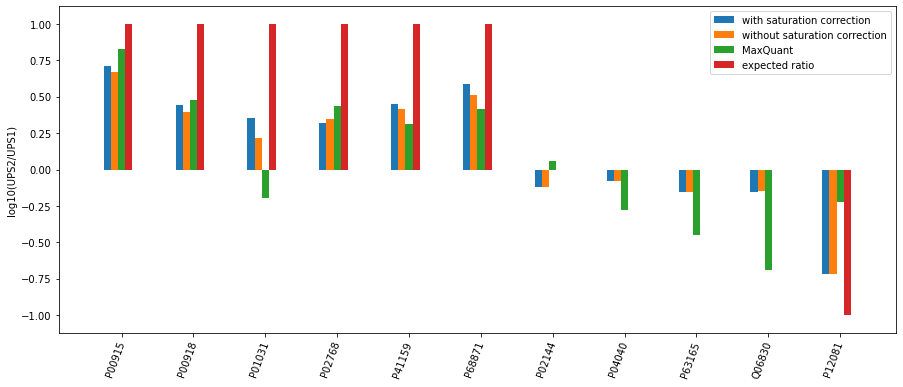

In [73]:
labels = combined_ratios_df.protein_code
ratio_with = np.log10(combined_ratios_df.ratio_with)
ratio_without = np.log10(combined_ratios_df.ratio_without)
mq_ratio = np.log10(combined_ratios_df.mq_ratio)
expected_ratio = np.log10(combined_ratios_df.expected_ratio)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

f, ax = plt.subplots()
f.set_figheight(6)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

rects1 = ax.bar(x - 2*width, ratio_with, width, label='with saturation correction')
rects2 = ax.bar(x - width, ratio_without, width, label='without saturation correction')
rects3 = ax.bar(x, mq_ratio, width, label='MaxQuant')
rects4 = ax.bar(x + width, expected_ratio, width, label='expected ratio')

# add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log10(UPS2/UPS1)')
# ax.set_title('ratio of protein intensity')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70, ha='right')
ax.legend()

# create offset transform (x=5pt)
from matplotlib.transforms import ScaledTranslation
dx, dy = 5, 0
offset = ScaledTranslation(dx/f.dpi, dy/f.dpi, scale_trans=f.dpi_scale_trans)

# apply offset transform to all xticklabels
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.show()

### compare relative intensities of top-3 peptides for each protein in UPS2 relative to a protein that was not corrected for saturation

In [74]:
ratios_df = combined_df[['protein','average_intensity_with','average_intensity_without','intensity_adjusted']].copy()


#### use for the intensity reference the most intense protein that was not corrected for saturation

In [75]:
reference_row = combined_df[combined_df.protein.str.startswith('Q06830')].iloc[0]
reference_intensity = reference_row.average_intensity_with

In [76]:
ratios_df['ratio_with'] = ratios_df.average_intensity_with / reference_intensity
ratios_df['ratio_without'] = ratios_df.average_intensity_without / reference_intensity

In [77]:
ratios_df['expected_ratio'] = ratios_df.apply(lambda row: (ups2_d[row.protein.split('ups')[0]] / 1000) / (ups2_d[reference_row.protein.split('ups')[0]] / 1000), axis=1)

In [78]:
ratios_df

,protein,average_intensity_with,average_intensity_without,intensity_adjusted,ratio_with,ratio_without,expected_ratio
0,P00915ups|CAH1_HUMAN_UPS,51585.000000,46818.333333,True,6.266399,5.687358,10.0
1,P00918ups|CAH2_HUMAN_UPS,50821.333333,44914.333333,True,6.173631,5.456066,10.0
2,P01031ups|CO5_HUMAN_UPS,38016.333333,21627.333333,True,4.618116,2.627227,10.0
3,P02144ups|MYG_HUMAN_UPS,6117.333333,6117.333333,False,0.743116,0.743116,1.0
4,P02768ups|ALBU_HUMAN_UPS,115886.000000,85755.666667,True,14.077502,10.417355,10.0
5,P04040ups|CATA_HUMAN_UPS,40754.333333,35426.666667,True,4.950721,4.303531,1.0
6,P12081ups|SYHC_HUMAN_UPS,3091.000000,3091.000000,False,0.375486,0.375486,0.1
7,P41159ups|LEP_HUMAN_UPS,35332.666667,30992.333333,True,4.292112,3.764861,10.0
8,"P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_...",3465.000000,3465.000000,False,0.420918,0.420918,1.0
9,P63165ups|SUMO1_HUMAN_UPS,1740.000000,1740.000000,False,0.211370,0.211370,1.0


In [79]:
ratios_df['ratio_with'].corr(ratios_df['expected_ratio'])

0.6663992156900627

In [80]:
ratios_df['ratio_without'].corr(ratios_df['expected_ratio'])

0.677690772965348